### Motivation

- Random Forest classification
- Random Forest regression
- Importance of Variables
- Evaluate Models
- Can you visualize your forest?

#### Random Forest Classification:
 - The multiple decision trees will go through a vote and eventually we will have the final decision. The class that is most "popular" will be the class chosen as the final answer by the random forest algorithm
 
#### Random Forest Regression:
- The final prediction is an average of the regressions of all trees

#### Advantagens:
- Random Forest as an algorithm to select variables
- Flexible for dealing with missing values

#### Disadvantages:
- May be slow
- May be difficult to interpret

--------------------------

In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Load database
# Change working directory
import os
os.chdir("C:\\Users\\enzoa\\OMNP\\PY\\Base de Dados")

wine = pd.read_csv("winequality-red.csv", sep = ";")

wine.shape

(1599, 12)

In [3]:
# Load the other database
import os
os.chdir("C:\\Users\\enzoa\\OMNP\\PY\\Base de Dados")
base_cc = pd.read_csv("cc_approvals.data", header = None)

print(base_cc.shape)

(690, 16)


________________________________________________________

### Wine - Split the database

In [4]:
# Eliminate the correlations and rewrite the database
correl_total = wine.corr().abs()

superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool))

var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

wine = wine.drop(wine[var_remove], axis=1)

# Split the data with the variables in x and the target in y
x_wine = wine.drop('quality', axis = 1)
y_wine = wine['quality']

x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_wine, y_wine, test_size = 0.50, random_state = 42)

<ipython-input-4-4e1e92830a0b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool))


________________________________________________________

### CC - Treating the database

In [5]:
# Replace the "?" and check if everything is ok
base_cc = base_cc.replace("?",np.NaN)

# Deal with NaNs
base_cc = base_cc.fillna(method = 'ffill')

# The variable number 13 looks like a zip code. Remove it first
base_cc = base_cc.drop([base_cc.columns[13]], axis = 1)

# Give columns names
base_cc.columns = ["var1","var2","var3","var4","var5","var6"
                   ,"var7","var8","var9","var10","var11","var12","var13","var14","alvo"]

# Use LabelEncoder
encoder = LabelEncoder()

# Go through and transforming the entire database
for variaveis in base_cc.columns:
    if base_cc[variaveis].dtype == 'object':
        base_cc[variaveis] = encoder.fit_transform(base_cc[variaveis])
        
# Create ranges of the variable var2
var2_int = list(range(base_cc.var2.min(), base_cc.var2.max()+100, 50))

# Create the name of the ranges
nome_int = [f'var2_i{i}' for i in range(len(var2_int)-1)]

# Assign to the data frame
base_cc['var2_int'] = pd.cut(base_cc.var2, var2_int, labels = nome_int, include_lowest = True)

# Deal with previous NaNs
base_cc = base_cc.fillna(method = 'ffill')

# Remove var2
base_cc = base_cc.drop("var2", axis=1)

# Convert dtype category to numeric
categorias = {"var2_int": {"var2_i0": 0, "var2_i1": 1, "var2_i2" : 2
                           , "var2_i3" : 3, "var2_i4" : 4, "var2_i5" : 5, "var2_i6" : 6}}

base_cc.replace(categorias, inplace = True)

# Split the data with the variables in x and the target in y
x_cc = base_cc.drop("alvo", axis = 1)
y_cc = base_cc["alvo"]

# Split training from testing
x_train_cc, x_test_cc, y_train_cc, y_test_cc = train_test_split(x_cc, y_cc, test_size = 0.5, random_state = 42)

________________________________________________________

### Random Forest for the regression task - Wine database

In [8]:
rf_wine = RandomForestRegressor(bootstrap = True
        , criterion = 'mse', max_depth = 3, max_features = 'auto'
        , min_samples_leaf = 1, min_samples_split = 2
        , n_estimators = 1000, n_jobs = 5, oob_score = True)  # n_estimators is the number of trees in the forest; n_jobs
                                                              # is a processing parameter

rf_wine.fit(x_train_wine, y_train_wine)

RandomForestRegressor(max_depth=3, n_estimators=1000, n_jobs=5, oob_score=True)

In [9]:
# Predictions for training and test
y_pred_train_wine = rf_wine.predict(x_train_wine)
y_pred_test_wine = rf_wine.predict(x_test_wine)

In [10]:
# Evaluate the results
MAE_train_wine = metrics.mean_absolute_error(y_train_wine, y_pred_train_wine)
R2_train_wine = metrics.r2_score(y_train_wine, y_pred_train_wine) 
RMSE_train_wine = sqrt(metrics.mean_squared_error(y_train_wine, y_pred_train_wine))

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_wine,2))
print('R2: ', round(R2_train_wine,2))
print('RMSE: ', round(RMSE_train_wine,2))

MAE_test_wine = metrics.mean_absolute_error(y_test_wine, y_pred_test_wine) 
R2_test_wine = metrics.r2_score(y_test_wine, y_pred_test_wine)
RMSE_test_wine = sqrt(metrics.mean_squared_error(y_test_wine, y_pred_test_wine))

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_wine, 2))
print('R2: ', round(R2_test_wine, 2))
print('RMSE: ', round(RMSE_test_wine, 2))

----- Avaliaçao do treinamento -----
MAE:  0.47
R2:  0.44
RMSE:  0.6

----- Avaliaçao do teste -----
MAE:  0.53
R2:  0.33
RMSE:  0.66


In [11]:
# Look only for the test
print("A qualidade média de vinho da base é: ")
print(round(y_test_wine.mean(),2))
print()
print("O percentual do MAE em relaçao à média da base: ")
print(round(metrics.mean_absolute_error(y_test_wine, y_pred_test_wine)/y_test_wine.mean()*100,2))  # Abaixo de 10% é uma delicinha

A qualidade média de vinho da base é: 
5.63

O percentual do MAE em relaçao à média da base: 
9.47


In [14]:
rf_wine.feature_importances_

array([0.01476066, 0.14237985, 0.01109624, 0.01138019, 0.00831425,
       0.15756748, 0.65450132])

In [15]:
x_train_wine.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')

In [13]:
# Analyze the importance of the variables
imp = pd.DataFrame({'Variaveis':x_train_wine.columns, 'Importancia':rf_wine.feature_importances_})

print(imp.sort_values(by = ['Importancia'], ascending = False))

             Variaveis  Importancia
6              alcohol     0.654501
5            sulphates     0.157567
1     volatile acidity     0.142380
0        fixed acidity     0.014761
3            chlorides     0.011380
2       residual sugar     0.011096
4  free sulfur dioxide     0.008314


In [17]:
# The contribution of the alcohol variable to the predictions made by the model is 65%.

# The cut-off point can be 80%~90%

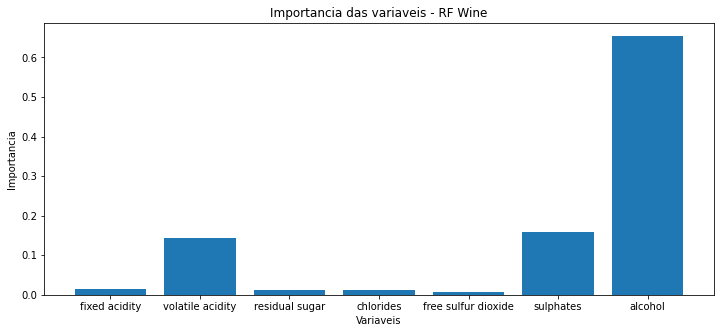

In [18]:
plt.figure(figsize = (12,5))
plt.xticks(range(len(imp)), imp['Variaveis'])
plt.xlabel('Variaveis')
plt.ylabel('Importancia')
plt.title('Importancia das variaveis - RF Wine')
plt.bar(range(len(imp)), imp['Importancia']); 

In [19]:
# Retrain the model with only the most important variables
sub_wine = wine.loc[:,["alcohol", "sulphates", "volatile acidity", "quality"]]

# Split the data with the variables in x and the target in y
x_wine = sub_wine.drop("quality", axis = 1)
y_wine = sub_wine["quality"]

x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_wine, y_wine, test_size = 0.50)

In [20]:
# Training the model2
rf_wine2 = RandomForestRegressor(bootstrap = True,
           criterion = 'mse', max_depth = 3, max_features = 'auto',
           min_samples_leaf = 1, min_samples_split = 2,
           n_estimators = 1000, n_jobs = 5, oob_score = True)

rf_wine2.fit(x_train_wine, y_train_wine)

# Predictions for training and test
y_pred_train_wine = rf_wine2.predict(x_train_wine)
y_pred_test_wine = rf_wine2.predict(x_test_wine)


# Evaluate the results
MAE_train_wine = metrics.mean_absolute_error(y_train_wine, y_pred_train_wine) 
R2_train_wine = metrics.r2_score(y_train_wine, y_pred_train_wine)
RMSE_train_wine = sqrt(metrics.mean_squared_error(y_train_wine, y_pred_train_wine))

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_wine,2))
print('R2: ', round(R2_train_wine,2))
print('RMSE: ', round(RMSE_train_wine,2))

MAE_test_wine = metrics.mean_absolute_error(y_test_wine, y_pred_test_wine) 
R2_test_wine = metrics.r2_score(y_test_wine, y_pred_test_wine)
RMSE_test_wine = sqrt(metrics.mean_squared_error(y_test_wine, y_pred_test_wine))

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_wine, 2))
print('R2: ', round(R2_test_wine, 2))
print('RMSE: ', round(RMSE_test_wine, 2))

In [21]:
# Look only for the test
print("A qualidade média de vinho da base é: ")
print(round(y_test_wine.mean(),2))
print()
print("O percentual do MAE em relaçao à média da base: ")
print(round(metrics.mean_absolute_error(y_test_wine, y_pred_test_wine)/y_test_wine.mean()*100, 2))

A qualidade média de vinho da base é: 
5.63

O percentual do MAE em relaçao à média da base: 
9.2


In [ ]:
# We have a better model - not necessarily in direct performance, but less complex given fewer variables

________________________________________________________

### Random Forest for the classification task - CC database

In [6]:
# Training the model
rf_cc = RandomForestClassifier(bootstrap = True,
           criterion = 'gini', max_depth = 3, max_features = 'auto', 
           min_samples_leaf = 1, min_samples_split = 2,
           n_estimators = 1500, n_jobs = 5, oob_score = True)

rf_cc.fit(x_train_cc, y_train_cc)

RandomForestClassifier(max_depth=3, n_estimators=1500, n_jobs=5, oob_score=True)

In [7]:
# Predictions for training and test
y_pred_train_cc = rf_cc.predict(x_train_cc)
y_pred_test_cc = rf_cc.predict(x_test_cc)

In [8]:
# Calculate the ROC and the Gini - Training
fpr_train_cc, tpr_train_cc, thresholds_train_cc = roc_curve(y_train_cc, y_pred_train_cc)
roc_auc_train_cc = auc(fpr_train_cc, tpr_train_cc)

print("AUC - Treinamento : %f" % roc_auc_train_cc)
print("Gini - Treinamento: ", round(2*roc_auc_train_cc-1,2))
print("\n")

# Calculate the ROC and the Gini - Test
fpr_test_cc, tpr_test_cc, thresholds_test_cc = roc_curve(y_test_cc, y_pred_test_cc)
roc_auc_test_cc = auc(fpr_test_cc, tpr_test_cc)

print("AUC - Teste : %f" % roc_auc_test_cc)
print("Gini - Teste: ", round(2*roc_auc_test_cc-1, 2))

AUC - Treinamento : 0.886438
Gini - Treinamento:  0.77


AUC - Teste : 0.865115
Gini - Teste:  0.73


In [9]:
# Notice the difference between the Gini of the training and the test. This is the advantage of ensemble

In [10]:
imp_cc = pd.DataFrame({'Variaveis':x_train_cc.columns, 'Importancia':rf_cc.feature_importances_})

print(imp_cc.sort_values(by = 'Importancia', ascending = False))

   Variaveis  Importancia
7       var9     0.390891
9      var11     0.137422
6       var8     0.127328
8      var10     0.098053
12     var14     0.095507
1       var3     0.047470
4       var6     0.044713
5       var7     0.013960
2       var4     0.011945
3       var5     0.010918
13  var2_int     0.010860
11     var13     0.005865
10     var12     0.003174
0       var1     0.001895


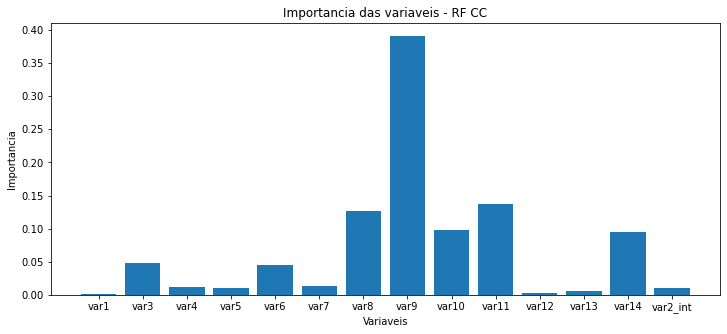

In [11]:
plt.figure(figsize = (12,5))
plt.xticks(range(len(imp_cc)), imp_cc['Variaveis'])
plt.xlabel('Variaveis')
plt.ylabel('Importancia')
plt.title('Importancia das variaveis - RF CC')
plt.bar(range(len(imp_cc)), imp_cc['Importancia']); 

In [18]:
# Retrain the model with only the most important variables
sub_cc = base_cc.loc[:,["var9", "var11", "var8", "var14", "var10", "alvo"]]

# Split the data with the variables in x and the target in y
x_cc = sub_cc.drop("alvo", axis = 1)
y_cc = sub_cc["alvo"]

x_train_cc, x_test_cc, y_train_cc, y_test_cc = train_test_split(x_cc, y_cc, test_size = 0.50)

In [19]:
# Training the model2
rf_cc = RandomForestClassifier(bootstrap = True,
           criterion = 'gini', max_depth = 3, max_features = 'auto', 
           min_samples_leaf = 1, min_samples_split = 2,
           n_estimators = 1500, n_jobs = 5, oob_score = True)

rf_cc.fit(x_train_cc, y_train_cc)

RandomForestClassifier(max_depth=3, n_estimators=1500, n_jobs=5, oob_score=True)

In [20]:
# Predictions for training and test
y_pred_train_cc = rf_cc.predict(x_train_cc)
y_pred_test_cc = rf_cc.predict(x_test_cc)

In [21]:
# Calculate the ROC and the Gini - Training
fpr_train_cc, tpr_train_cc, thresholds_train_cc = roc_curve(y_train_cc, y_pred_train_cc)
roc_auc_train_cc = auc(fpr_train_cc, tpr_train_cc)

print("AUC - Treinamento : %f" % roc_auc_train_cc)
print("Gini - Treinamento: ", round(2*roc_auc_train_cc-1,2))
print("\n")

# Calculate the ROC and the Gini - Test
fpr_test_cc, tpr_test_cc, thresholds_test_cc = roc_curve(y_test_cc, y_pred_test_cc)
roc_auc_test_cc = auc(fpr_test_cc, tpr_test_cc)

print("AUC - Teste : %f" % roc_auc_test_cc)
print("Gini - Teste: ", round(2*roc_auc_test_cc-1, 2))

AUC - Treinamento : 0.867842
Gini - Treinamento:  0.74


AUC - Teste : 0.844397
Gini - Teste:  0.69


________________________________________________________

### Can you visualize your forest?

In [29]:
# To view the decision tree, follow these steps, in this order:

# 1 - Download this file - https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# 2 - Install the graphviz and pydotplus libraries
# 3 - Run the following code every time you want to plot:

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [30]:
# Observe a tree
arvore = rf_cc.estimators_[42]  # Here I only see tree 42

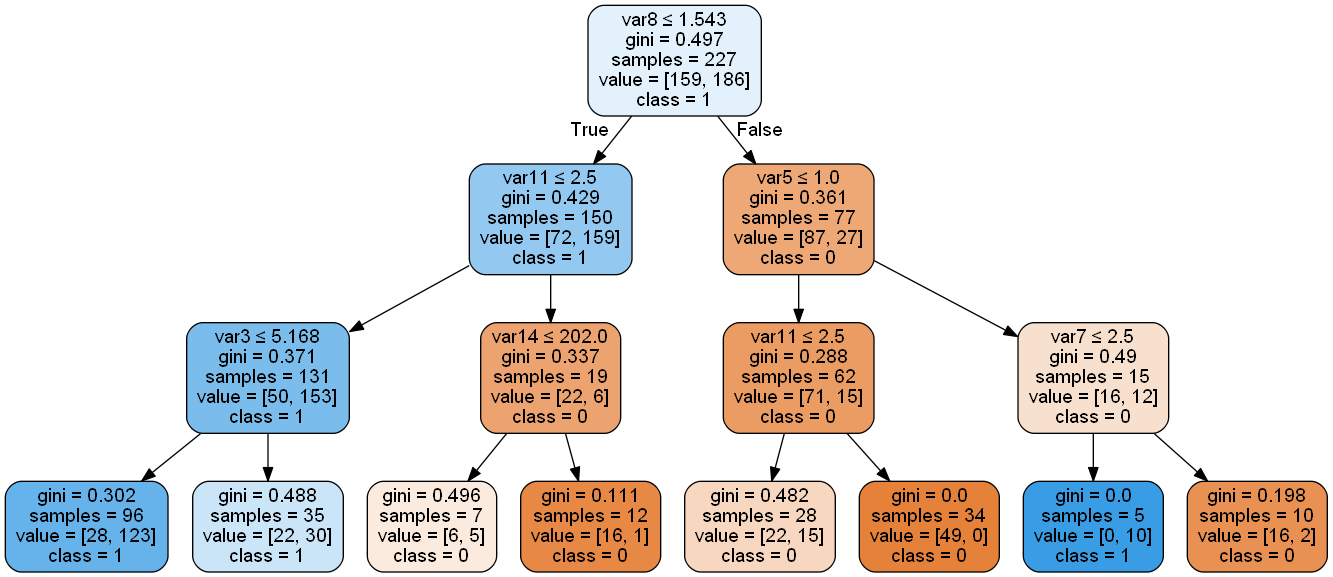

In [33]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(arvore
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = base_cc.columns[0:14]
                , class_names = ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue());
  
Image(graph.create_png())